In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import pywt

In [4]:
data_fft = pd.read_csv('heart.csv')
data_fft

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Text(0, 0.5, 'Tachicardia')

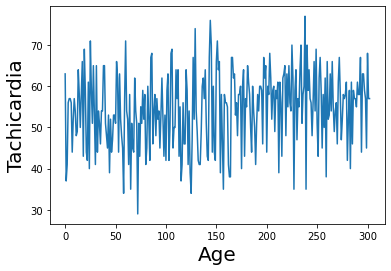

In [8]:
y = np.array(data_fft.thalachh)
x=np.array(data_fft.age)
#date_array = pd.to_datetime(data_fft.Datetime)
plt.plot(x,)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Tachicardia',fontsize=20)

## Fourier Transform

(0.0, 200.0)

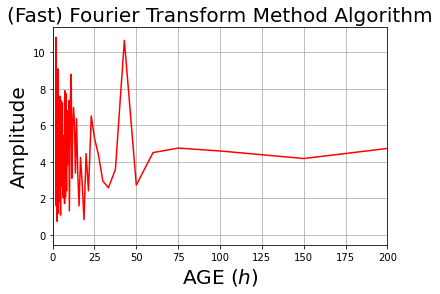

In [10]:
FFT =np.fft.fft(y_detrend)
new_N=int(len(FFT)/2) 
f_nat=1
new_X = np.linspace(10**-12, f_nat/2, new_N, endpoint=True)
new_Xph=1.0/(new_X)
FFT_abs=np.abs(FFT)
plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='red')
plt.xlabel('AGE ($h$)',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.title('(Fast) Fourier Transform Method Algorithm',fontsize=20)
plt.grid(True)
plt.xlim(0,200)

### Sort the peaks

In [11]:
fft_abs = 2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph)
fft_abs = pd.DataFrame(fft_abs, columns = ['Amplitude'])
fft_sorted = fft_abs.sort_values(by='Amplitude',ascending=False).head(20)
fft_sorted

,Amplitude
147,10.812908
7,10.642003
96,9.083698
27,8.787597
94,8.738454
119,8.423306
125,8.062306
105,8.054604
41,7.885546
38,7.740537


In [12]:
fft_sorted.index/24

Float64Index([             6.125, 0.2916666666666667,                4.0,
                           1.125, 3.9166666666666665,  4.958333333333333,
               5.208333333333333,              4.375, 1.7083333333333333,
              1.5833333333333333,               2.75, 3.0833333333333335,
              1.1666666666666667, 3.5416666666666665, 1.2916666666666667,
                           2.375,                2.5,  4.791666666666667,
                           2.125, 3.6666666666666665],
             dtype='float64')

## Noise Filtering

In [13]:
#Defining the filtering function
def fft_filter(th):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

In [14]:
#Showing the plots at different thresholds values
#Defining the amplitude filtering function
def fft_filter_amp(th):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

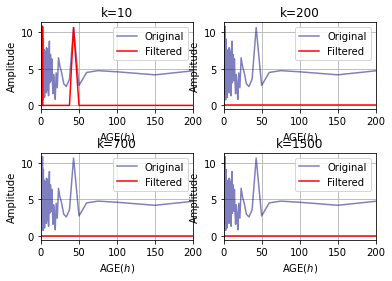

In [15]:
K_plot=[10,200,700,1500]
j=0
for k in K_plot:
    j=j+1
    plt.subplot(2,2,j)
    plt.title('k=%i'%(k))
    plt.xlim(0,200)
    plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='navy',alpha=0.5,label='Original')
    plt.grid(True)
    plt.plot(new_Xph,fft_filter_amp(k),'red',label='Filtered')
    plt.xlabel('AGE($h$)')
    plt.ylabel('Amplitude')
    plt.legend()
plt.subplots_adjust(hspace=0.5)

In [16]:
def fft_filter(perc):
    th=perc*(2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph)).max()
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

## Noise Filtering(Wavelet Transform)

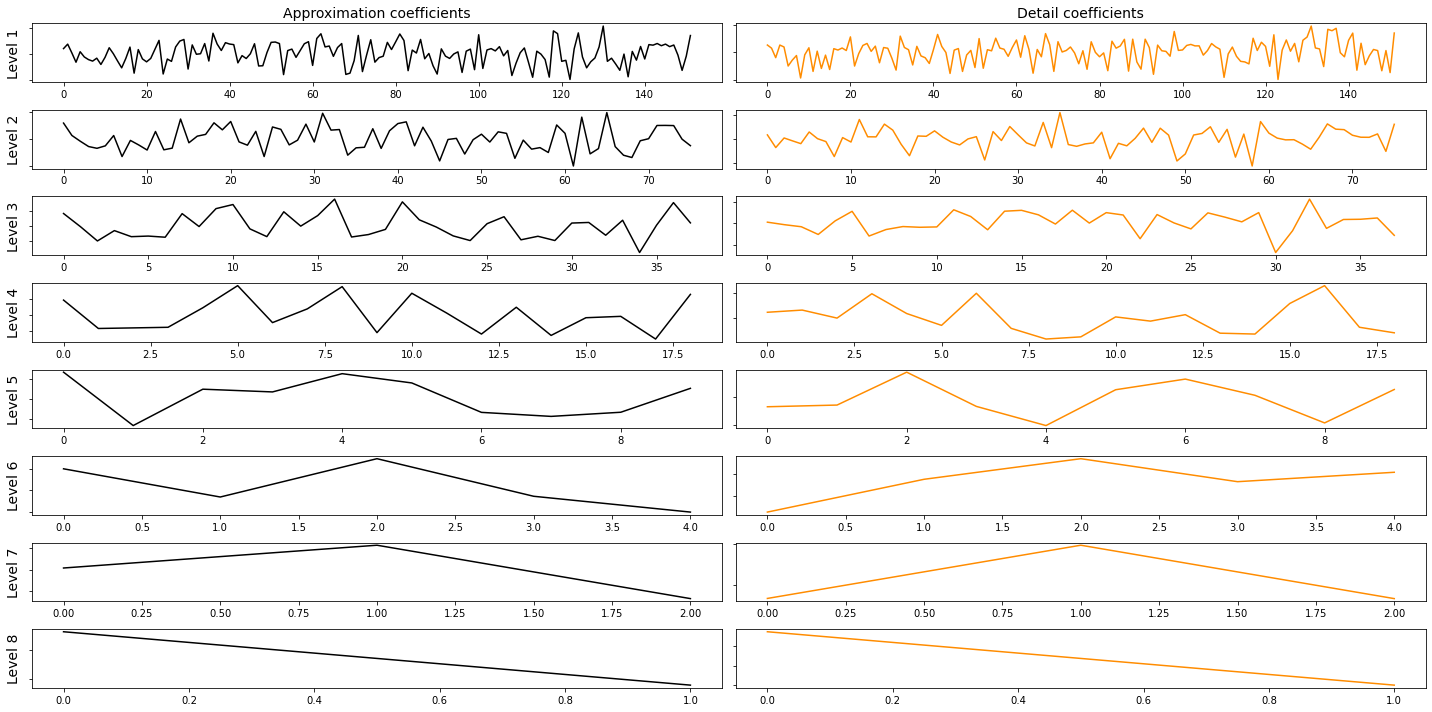

In [20]:
time=x.max()
sample_rate=1/900.
size= int(sample_rate*time)
t = np.linspace(0, time, num=size)
dataset = y_detrend
waveletname = 'sym2'
levels=8
fig, axarr = plt.subplots(nrows=levels, ncols=2, figsize=(20,10))
COEFF_D=[]
DATASET=[]
k=1
for ii in range(levels):
    (dataset, coeff_d) = pywt.dwt(dataset, waveletname,mode='per')
    axarr[ii, 0].plot(dataset, 'black')
    axarr[ii, 1].plot(coeff_d, 'darkorange')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
    #print(len(coeff_d))
    COEFF_D.append(np.repeat(coeff_d,2**k))
    DATASET.append(np.repeat(dataset,2**k))
    k=k+1
plt.tight_layout()
plt.show()